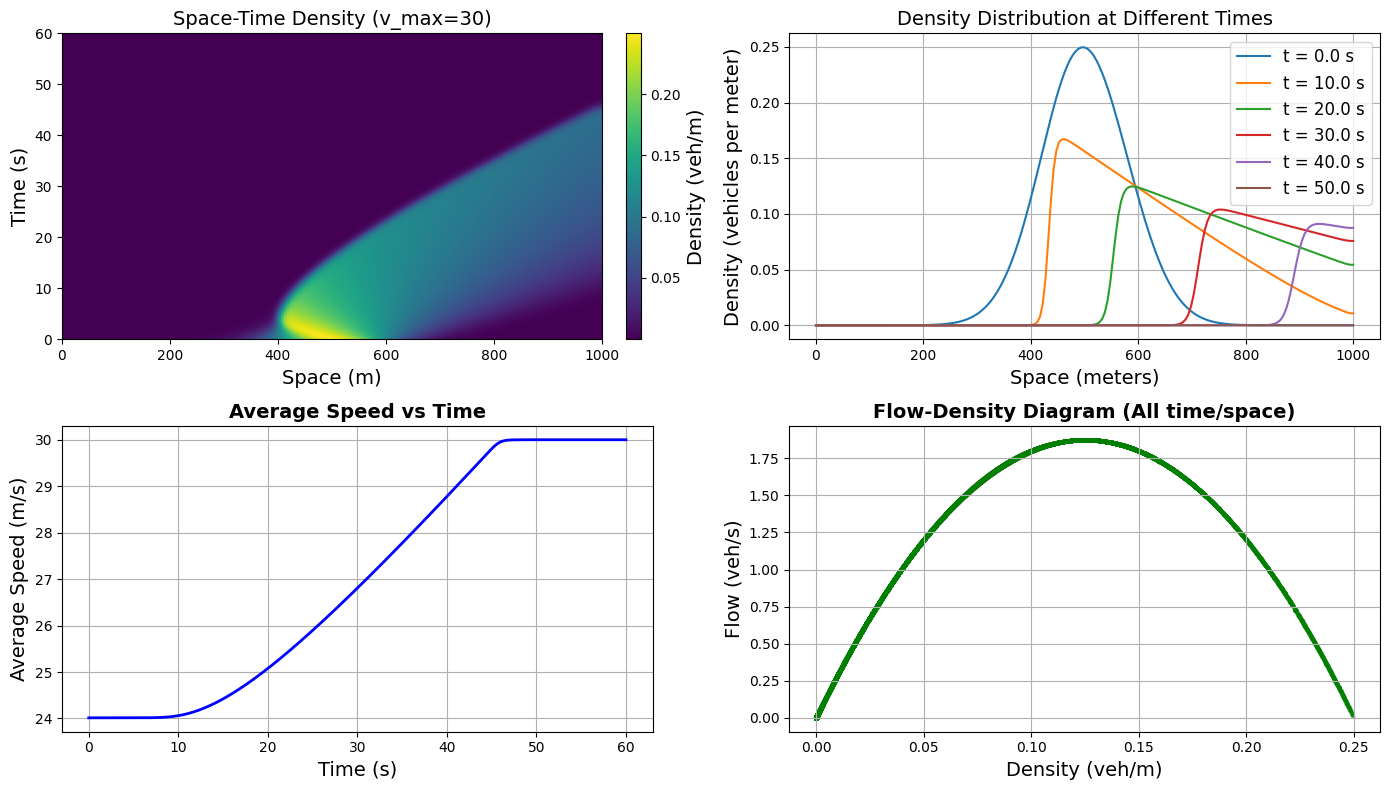

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def v_desired(rho, v_max, rho_max):
   
    return v_max * (1 - rho / rho_max)

def run_pw_model(rho_init, v_max, rho_max, dt, dx, time_steps, tau, rho_threshold, S_in):
   
    rho = rho_init.copy()
    v = v_desired(rho, v_max, rho_max)

    density_history = []
    velocity_history = []
    

    for _ in range(time_steps):
     
        f = rho * v
        
        
        rho_next = np.zeros_like(rho)
        rho_next[1:-1] = 0.5*(rho[:-2] + rho[2:]) - dt/(2*dx)*(f[2:] - f[:-2])
        
        # (Neumann )
        rho_next[0] = rho_next[1] 
        
        rho_next[-1] = rho_next[-2]
        
     
        v_des_val = v_desired(rho_next, v_max, rho_max)
        
        
        rho, v = rho_next, v_des_val
        
        density_history.append(rho.copy())
        velocity_history.append(v.copy())
        
        
    density_history = np.array(density_history)
    velocity_history = np.array(velocity_history)
    flow_history = density_history * velocity_history  # q = rho * v

    return density_history, velocity_history, flow_history 



L = 1000
N_x = 200
T = 60
dt = 0.1
time_steps = int(T/dt)
dx = L / N_x

rho_max_global = 0.25
reaction_time = 0.2
rho_threshold = 0.15

v_max_test = 30


x = np.linspace(0, L, N_x)
x0 = L / 2
sigma = 80
rho_init = rho_max_global * np.exp(-((x - x0)**2)/(2*sigma**2))


density_his, velocity_his, flow_his = run_pw_model(
    rho_init, v_max_test, rho_max_global, 
    dt, dx, time_steps, reaction_time, rho_threshold, S_in
)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))


ax1 = axes[0, 0]
im1 = ax1.imshow(
    density_his, 
    aspect='auto', 
    origin='lower', 
    extent=[0, L, 0, T], 
    cmap='viridis'
)
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
cbar1.set_label("Density (veh/m)",fontsize=14)
ax1.set_title(f"Space-Time Density (v_max={v_max_test})",fontsize=14)
ax1.set_xlabel("Space (m)",fontsize=14)
ax1.set_ylabel("Time (s)",fontsize=14)

ax2 = axes[0, 1]
for t in range(0, time_steps,100):  
    ax2.plot(np.linspace(0, L, N_x), density_his[t], label=f't = {t*dt:.1f} s')

ax2.set_title('Density Distribution at Different Times',fontsize=14)
ax2.set_xlabel('Space (meters)',fontsize=14)
ax2.set_ylabel('Density (vehicles per meter)',fontsize=14)
ax2.grid()
ax2.legend( prop={'size':12})

ax3 = axes[1, 0]

vel_time_avg=np.mean(velocity_his,axis=1)
t_array = np.linspace(0, T, time_steps)
ax3.plot(t_array, vel_time_avg, color='blue', lw=2)
ax3.set_title("Average Speed vs Time",fontweight='bold',fontsize=14)
ax3.set_xlabel("Time (s)",fontsize=14)
ax3.set_ylabel("Average Speed (m/s)",fontsize=14)
ax3.grid(True)


ax4 = axes[1, 1]
rho_flat = density_his.ravel()
flow_flat = flow_his.ravel()
ax4.scatter(rho_flat, flow_flat, s=5, alpha=0.3, color='green')
ax4.set_title("Flow-Density Diagram (All time/space)",fontweight='bold',fontsize=14)
ax4.set_xlabel("Density (veh/m)",fontsize=14)
ax4.set_ylabel("Flow (veh/s)",fontsize=14)

ax4.grid(True)

plt.tight_layout()
plt.show()


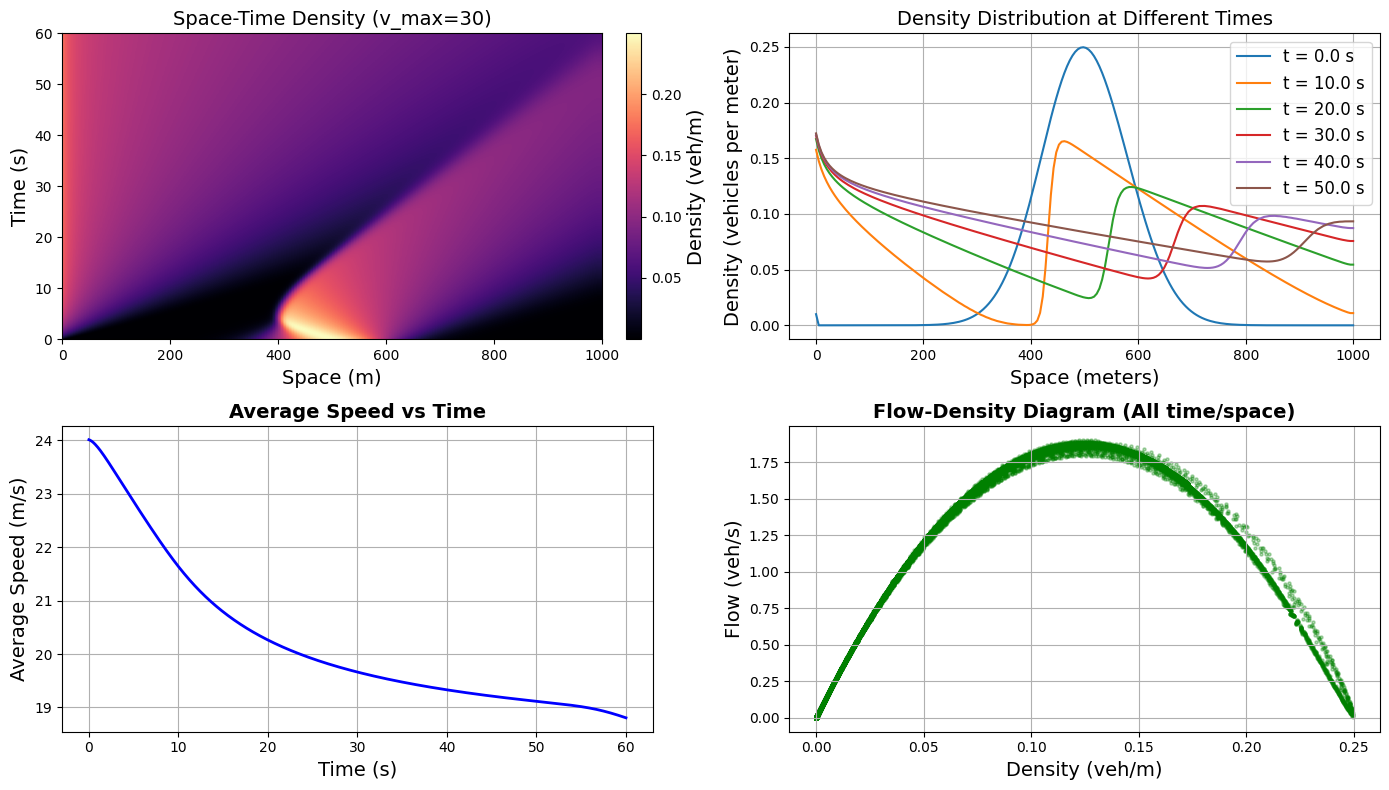

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def v_desired(rho, v_max, rho_max):
 
    return v_max * (1 - rho / rho_max)

def run_pw_model(rho_init, v_max, rho_max, dt, dx, time_steps, tau, rho_threshold, S_in):
   
    rho = rho_init.copy()
    v = v_desired(rho, v_max, rho_max)

    density_history = []
    velocity_history = []
    

    for _ in range(time_steps):
     
        f = rho * v
        
       
        rho_next = np.zeros_like(rho)
        rho_next[1:-1] = 0.5*(rho[:-2] + rho[2:]) - dt/(2*dx)*(f[2:] - f[:-2])
        
      
        rho_next[0] = rho_next[1] + S_in*dt
        
        rho_next[-1] = rho_next[-2]
        
       
        v_des_val = v_desired(rho_next, v_max, rho_max)
        v_next = v + dt/tau * (v_des_val - v)
        
        rho, v = rho_next, v_next
        
        density_history.append(rho.copy())
        velocity_history.append(v.copy())
        
        
    density_history = np.array(density_history)
    velocity_history = np.array(velocity_history)
    flow_history = density_history * velocity_history  # q = rho * v

    return density_history, velocity_history, flow_history 


L = 1000
N_x = 200
T = 60
dt = 0.1
time_steps = int(T/dt)
dx = L / N_x

rho_max_global = 0.25
reaction_time = 0.2
rho_threshold = 0.15
S_in = 0.1  

v_max_test = 30

x = np.linspace(0, L, N_x)
x0 = L / 2
sigma = 80
rho_init = rho_max_global * np.exp(-((x - x0)**2)/(2*sigma**2))

density_his, velocity_his, flow_his = run_pw_model(
    rho_init, v_max_test, rho_max_global, 
    dt, dx, time_steps, reaction_time, rho_threshold, S_in
)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

ax1 = axes[0, 0]
im1 = ax1.imshow(
    density_his, 
    aspect='auto', 
    origin='lower', 
    extent=[0, L, 0, T], 
    cmap='magma'
)
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
cbar1.set_label("Density (veh/m)",fontsize=14)
ax1.set_title(f"Space-Time Density (v_max={v_max_test})",fontsize=14)
ax1.set_xlabel("Space (m)",fontsize=14)
ax1.set_ylabel("Time (s)",fontsize=14)

ax2 = axes[0, 1]
for t in range(0, time_steps,100):  
    ax2.plot(np.linspace(0, L, N_x), density_his[t], label=f't = {t*dt:.1f} s')

ax2.set_title('Density Distribution at Different Times',fontsize=14)
ax2.set_xlabel('Space (meters)',fontsize=14)
ax2.set_ylabel('Density (vehicles per meter)',fontsize=14)
ax2.grid()
ax2.legend( prop={'size':12})

ax3 = axes[1, 0]

vel_time_avg=np.mean(velocity_his,axis=1)
t_array = np.linspace(0, T, time_steps)
ax3.plot(t_array, vel_time_avg, color='blue', lw=2)
ax3.set_title("Average Speed vs Time",fontweight='bold',fontsize=14)
ax3.set_xlabel("Time (s)",fontsize=14)
ax3.set_ylabel("Average Speed (m/s)",fontsize=14)
ax3.grid(True)


ax4 = axes[1, 1]
rho_flat = density_his.ravel()
flow_flat = flow_his.ravel()
ax4.scatter(rho_flat, flow_flat, s=5, alpha=0.3, color='green')
ax4.set_title("Flow-Density Diagram (All time/space)",fontweight='bold',fontsize=14)
ax4.set_xlabel("Density (veh/m)",fontsize=14)
ax4.set_ylabel("Flow (veh/s)",fontsize=14)

ax4.grid(True)

plt.tight_layout()
plt.show()


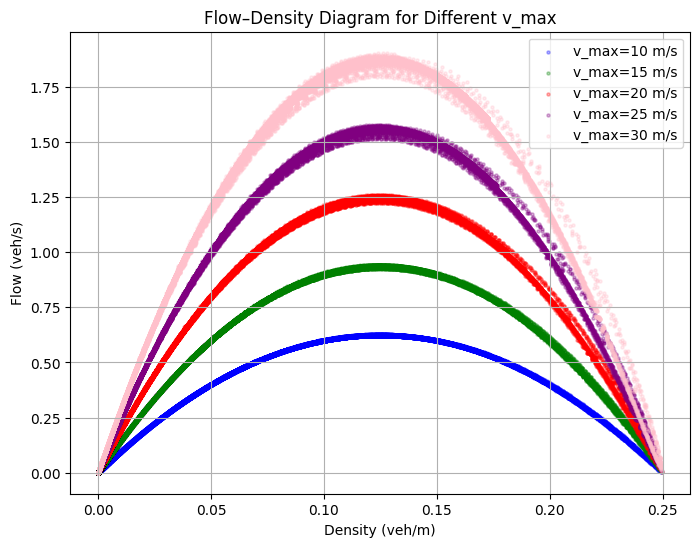

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def v_desired(rho, v_max, rho_max):
    return v_max * (1 - rho / rho_max)

def run_pw_model(rho_init, v_max, rho_max, dt, dx, time_steps, tau, rho_threshold, S_in):
    
    rho = rho_init.copy()
    v = v_desired(rho, v_max, rho_max)

    density_history = []
    velocity_history = []
    congestion_count = 0

    for _ in range(time_steps):
        f = rho * v  # flow
        rho_next = np.zeros_like(rho)
        rho_next[1:-1] = 0.5*(rho[:-2] + rho[2:]) - dt/(2*dx)*(f[2:] - f[:-2])
        
 
        rho_next[0] = rho_next[1] + S_in*dt
        rho_next[-1] = rho_next[-2]

        v_des_val = v_desired(rho_next, v_max, rho_max)
        v_next = v + dt / tau * (v_des_val - v)

        rho, v = rho_next, v_next

        density_history.append(rho.copy())
        velocity_history.append(v.copy())

        if np.any(rho > rho_threshold):
            congestion_count += 1

    density_history = np.array(density_history)
    velocity_history = np.array(velocity_history)
    flow_history = density_history * velocity_history
    return density_history, velocity_history, flow_history, congestion_count



L = 1000
N_x = 200
T = 60
dt = 0.1
time_steps = int(T / dt)
dx = L / N_x

rho_max_global = 0.25
reaction_time = 0.2
rho_threshold = 0.2
S_in = 0.1


x = np.linspace(0, L, N_x)
x0 = L / 2.0
sigma = 80.0
rho_init = rho_max_global * np.exp(-((x - x0)**2)/(2*sigma**2))


vmax_values = [10, 15, 20,25, 30]  


plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'purple','pink'] 
for i, v_max_test in enumerate(vmax_values):

    density_his, velocity_his, flow_his, congest_cnt = run_pw_model(
        rho_init, v_max_test, rho_max_global,
        dt, dx, time_steps, reaction_time, rho_threshold, S_in
    )

  
    rho_flat  = density_his.ravel()   
    flow_flat = flow_his.ravel()      


    plt.scatter(rho_flat, flow_flat, 
                s=5, alpha=0.3, 
                color=colors[i % len(colors)],
                label=f"v_max={v_max_test} m/s")

plt.title("Flow–Density Diagram for Different v_max")
plt.xlabel("Density (veh/m)")
plt.ylabel("Flow (veh/s)")
plt.grid(True)
plt.legend()
plt.show()
